In [2]:
#Preprocesamiento
import numpy as np #operaciones númericas
import pandas as pd #cargar data y trabajar con variables
import matplotlib.pyplot as plt #permite hacer gráficos
import seaborn as sns #crea gráficos más atractivos y sofisticados con menos código.
#Entrenamiento del modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Ajustes del modelo
from sklearn.model_selection import GridSearchCV


In [3]:
ObesityData = pd.read_csv('Data/ObesityData.csv') #lee la data

In [4]:
ObesityData.info() #arroja información general de la data
ObesityData.isnull().sum() #Suma los datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


Tenemos 2111 datos en cada variable. La Data no tiene valores nulos. Tenemos 17 columnas.

Tipo de dato float64

Qué es: Representa un número de punto flotante de doble precisión. Esto significa que puede almacenar números decimales con una alta precisión, incluyendo números muy grandes o muy pequeños.
Cuándo se usa: Se utiliza típicamente para representar:
Medidas: Altura, peso, temperatura, etc.
Valores numéricos continuos: Resultados de cálculos, porcentajes, etc.
Números con decimales: 3.14159, 0.0001, etc.

Tipo de dato object

Qué es: Es un tipo de dato genérico que puede contener cualquier tipo de objeto en Python. Esto incluye cadenas de texto, fechas, listas, diccionarios, y otros objetos más complejos.
Cuándo se usa:
Datos mixtos: Cuando una columna contiene una mezcla de tipos de datos, Pandas la asigna como tipo object.
Cadenas de texto: Nombres, direcciones, descripciones, etc.
Fechas: Si las fechas no se han convertido a un tipo de fecha específico.
Objetos personalizados: Instancias de clases definidas por el usuario.

int64:

Representa números enteros de 64 bits.
Se utiliza para almacenar números enteros grandes o pequeños.
Ejemplo: 42, -100, 0
Uso típico:
Contadores, identificadores únicos, años.
Valores discretos sin decimales

In [5]:
ObesityData.head() #me muestra las primeras 5 linea del Data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Definición de Variables

Gender: género

Age: edad

Height: altura

Weight: peso

Antecentes de obesidad en la familia: family_history_with_overweight

Consume alimentos de alto contenido calórico: FAVC

Consume verduras durante las comidad:FCVC

Número de comidas principales consumidas al día: NCP

Consume alimentos entre comidad: CAEC

Fuma: SMOKE

Consumo diario de agua (litros): CH2O

Controla las calorías que consume al día: SSC

Frecuencia con la cual realiza actividad física: FAF

Tiempo que usa aparatos electrónicos a diario: TUE

Consumo de alcohol: CALC

Medio de transporte que usualmente usa: MTRANS



In [6]:
# Función para aplicar unique y hallar valores únicos de las variables
def obtener_valores_unicos(ObesityData, columnas):
  """
  Obtiene los valores únicos de múltiples columnas de un DataFrame.

  Args:
    dataframe: El DataFrame.
    columnas: Una lista con los nombres de las columnas.
  """

  for columna in columnas:
    valores_unicos = ObesityData[columna].unique()
    print(f"Valores únicos en la columna {columna}: {valores_unicos}")

In [7]:
obtener_valores_unicos(ObesityData, ['CAEC', 'CALC', 'MTRANS', 'NObeyesdad', 'Gender'])

Valores únicos en la columna CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
Valores únicos en la columna CALC: ['no' 'Sometimes' 'Frequently' 'Always']
Valores únicos en la columna MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Valores únicos en la columna NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
Valores únicos en la columna Gender: ['Female' 'Male']


In [8]:
def mapear_valores(ObesityData, columna, mapeo):
  """
  Mapea los valores de una columna de un DataFrame según un diccionario de mapeo.

  Args:
    dataframe: El DataFrame al que se aplicará el mapeo.
    columna: El nombre de la columna a mapear.
    mapeo: Un diccionario que mapea los valores antiguos a los nuevos.
  """

  ObesityData[columna] = ObesityData[columna].map(mapeo)

In [9]:
mapeo_calc_caec = {'Sometimes': 2, 'Frequently': 3, 'Always': 4, 'no': 1}
mapeo_mtrans = {'Public_Transportation': 2, 'Motorbike': 3, 'Automobile': 4, 'Walking': 1, 'Bike': 5}
mapeo_gender = {'Female': 1, 'Male': 1}
mapeo_nobeyesdad = {'Insufficient_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Normal_Weight': 0, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}

In [10]:
mapear_valores(ObesityData, 'CALC', mapeo_calc_caec)
mapear_valores(ObesityData, 'CAEC', mapeo_calc_caec)
mapear_valores(ObesityData, 'MTRANS', mapeo_mtrans)
mapear_valores(ObesityData, 'Gender', mapeo_gender)
mapear_valores(ObesityData, 'NObeyesdad', mapeo_nobeyesdad)

In [11]:
#Función para definir tipos de columnas como int
def convertir_columnas_a_int(ObesityData, columnas):
  """
  Convierte múltiples columnas de un DataFrame a tipo de dato entero.

  Args:
    dataframe: El DataFrame al que se aplicarán los cambios.
    columnas: Una lista con los nombres de las columnas a convertir.
  """

  for columna in columnas:
    ObesityData[columna] = ObesityData[columna].astype(int)


In [12]:
columnas_a_convertir = ['MTRANS', 'FAF', 'TUE', 'NCP', 'FCVC', 'CH2O']
convertir_columnas_a_int(ObesityData, columnas_a_convertir)

In [13]:
#función para convertir_booleanos_a_numericos
def convertir_booleanos_a_numericos(ObesityData, columnas):
  """
  Convierte columnas booleanas (con valores 'yes' o 'no') a valores numéricos (1 o 0).

  Args:
    dataframe: El DataFrame al que se aplicarán los cambios.
    columnas: Una lista con los nombres de las columnas a convertir.
  """

  for columna in columnas:
    ObesityData[columna] = (ObesityData[columna] == 'yes').astype(int)

In [14]:
columnas_a_convertir = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
convertir_booleanos_a_numericos(ObesityData, columnas_a_convertir)

In [15]:
ObesityData.head() #me muestra las primeras lineas del Data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2,3,2,0,2,0,0,1,1,2,0
1,1,21.0,1.52,56.0,1,0,3,3,2,1,3,1,3,0,2,2,0
2,1,23.0,1.80,77.0,1,0,2,3,2,0,2,0,2,1,3,2,0
3,1,27.0,1.80,87.0,0,0,3,3,2,0,2,0,2,0,3,1,2
4,1,22.0,1.78,89.8,0,0,2,1,2,0,2,0,0,0,2,2,3


In [16]:
tabla_frecuencias = pd.crosstab(ObesityData['NObeyesdad'], ObesityData['NObeyesdad'])

print(tabla_frecuencias)

NObeyesdad    0    1    2    3    4    5    6
NObeyesdad                                   
0           287    0    0    0    0    0    0
1             0  272    0    0    0    0    0
2             0    0  290    0    0    0    0
3             0    0    0  290    0    0    0
4             0    0    0    0  351    0    0
5             0    0    0    0    0  297    0
6             0    0    0    0    0    0  324


<Axes: >

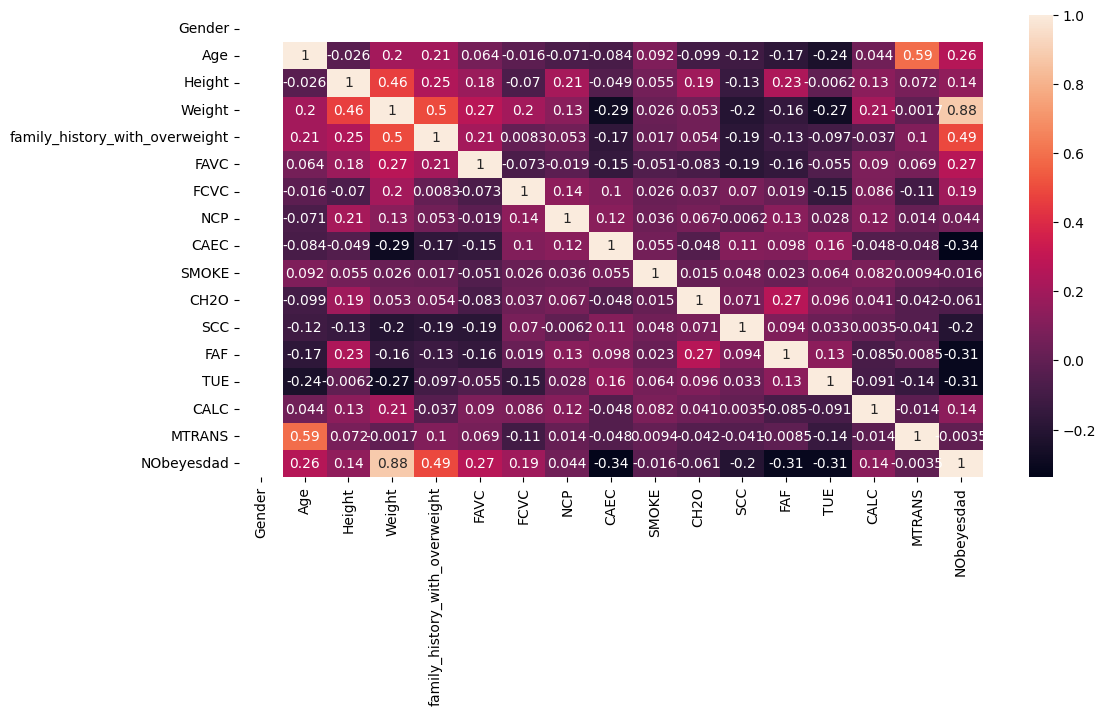

In [17]:
# Analizar la correlación de las caracteristicas con respecto a la columna objetivo.
plt.figure(figsize=(12,6))
sns.heatmap(ObesityData.corr(),annot=True)

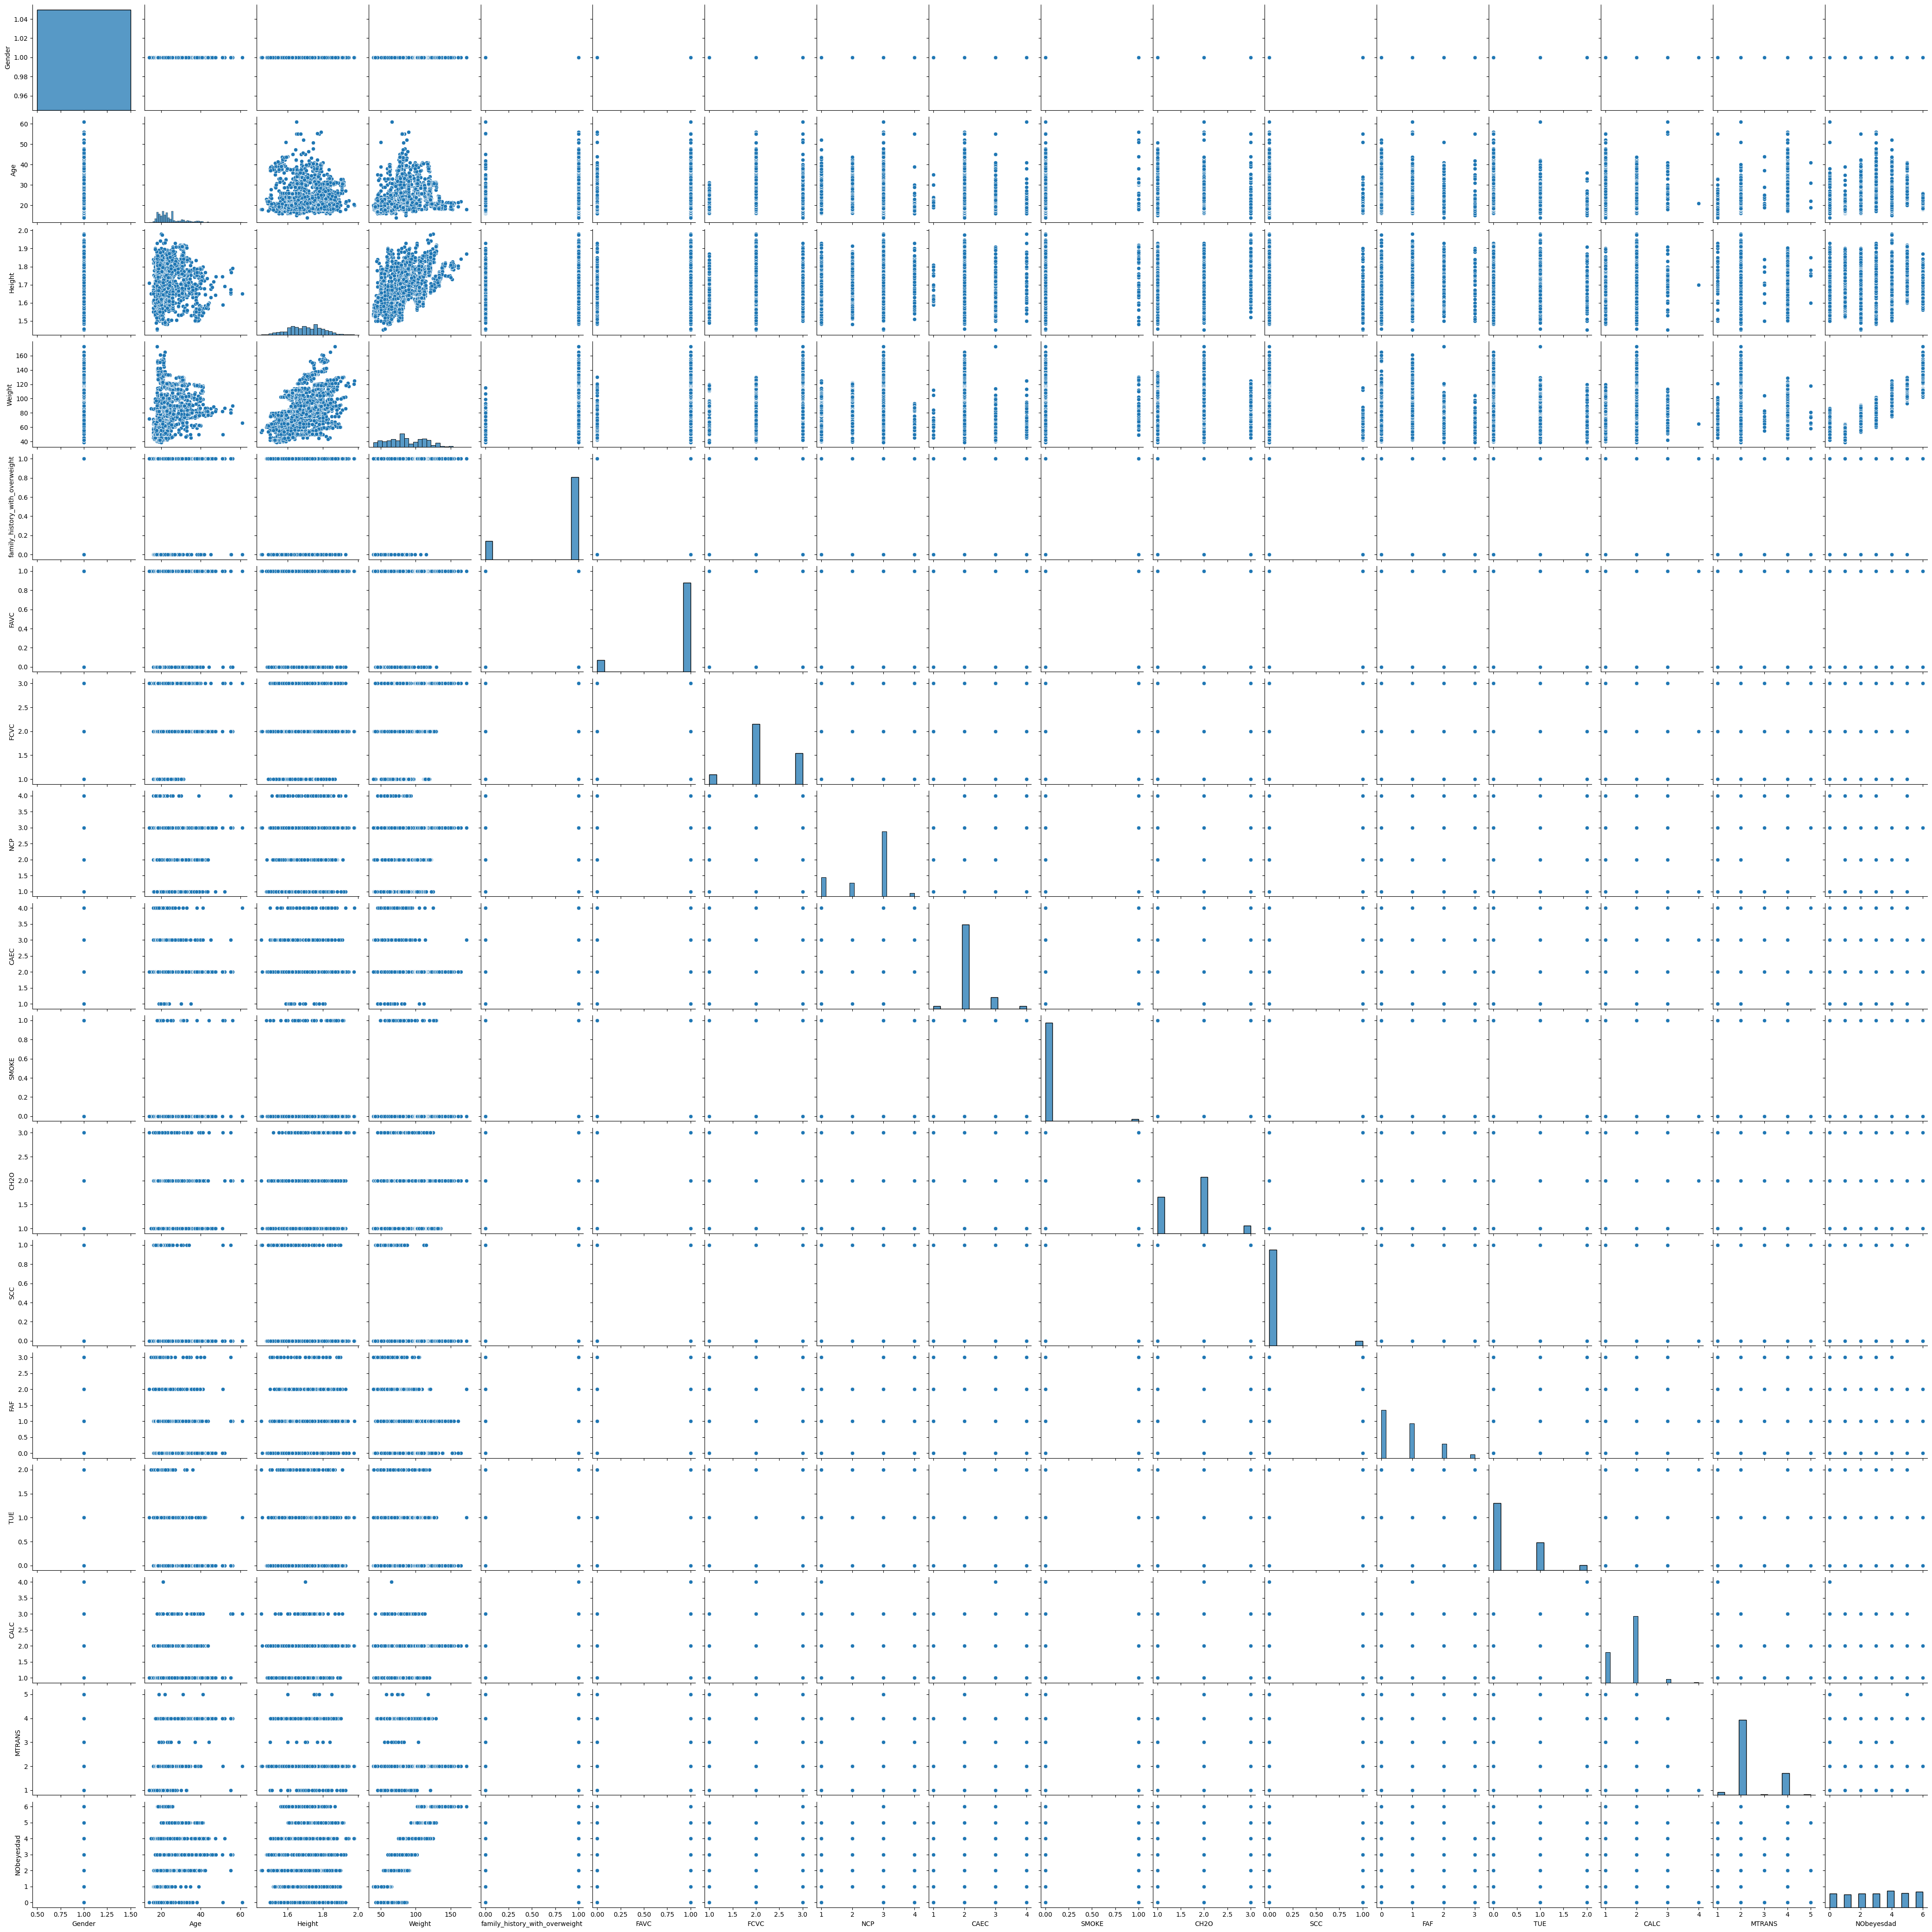

In [20]:
sns.pairplot(ObesityData)
plt.show()

# ***Eleccción del modelo ***


Modelo a considerar:

¿Qué es XGBoost?

XGBoost, que significa "Extreme Gradient Boosting", es un algoritmo de aprendizaje automático de última generación que se ha convertido en una herramienta fundamental en el campo de la ciencia de datos. Se basa en el concepto de boosting, una técnica que combina múltiples modelos débiles (como árboles de decisión) para crear un modelo fuerte y preciso.

¿Cómo funciona?

Árboles de decisión: XGBoost utiliza árboles de decisión como modelos base. Cada árbol es relativamente simple, pero cuando se combinan muchos de ellos, se puede obtener un modelo muy poderoso.

Boosting: El algoritmo comienza entrenando un árbol de decisión en los datos. Luego, entrena un segundo árbol para predecir los errores del primer árbol. Este proceso se repite varias veces, con cada nuevo árbol aprendiendo de los errores de los anteriores.

Regularización: XGBoost incorpora técnicas de regularización para evitar el sobreajuste, lo que significa que el modelo se generaliza mejor a nuevos datos.

Paralelización: XGBoost está optimizado para aprovechar múltiples núcleos de CPU y GPUs, lo que lo hace muy eficiente para grandes conjuntos de datos.
Ventajas de XGBoost:

Alta precisión: Con frecuencia supera a otros algoritmos en términos de precisión predictiva.

Flexibilidad: Se puede aplicar a una amplia variedad de problemas, incluyendo clasificación, regresión y ranking.

Eficiencia: Es muy eficiente en términos de tiempo de entrenamiento, especialmente para grandes conjuntos de datos.

Regularización: Reduce el riesgo de sobreajuste.
Manejo de datos faltantes: Puede manejar datos faltantes de forma efectiva.

Implementación: Disponible en varios lenguajes de programación, como Python, R, C++ y Java.
¿Cuándo usar XGBoost?

Problemas de clasificación y regresión: XGBoost es excelente para ambos tipos de problemas.

Grandes conjuntos de datos: Se desempeña muy bien con grandes cantidades de datos.

Datos estructurados y no estructurados: Puede trabajar con una variedad de tipos de datos.

Cuando se requiere alta precisión: Si la precisión es la prioridad principal.

In [21]:
list(ObesityData)

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [22]:
# Separar características y etiquetas
X = ObesityData.drop('NObeyesdad', axis=1)
y = ObesityData['NObeyesdad']

In [23]:
#División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Crear el modelo XGBoost
model = xgb.XGBClassifier()

In [25]:
# Entrenar el modelo
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [26]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [27]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9574468085106383

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90        62
           1       0.93      0.98      0.96        56
           2       0.89      0.98      0.93        56
           3       1.00      1.00      1.00        50
           4       0.97      0.95      0.96        78
           5       0.97      0.97      0.97        58
           6       0.98      1.00      0.99        63

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423


Confusion Matrix:
 [[52  4  6  0  0  0  0]
 [ 1 55  0  0  0  0  0]
 [ 1  0 55  0  0  0  0]
 [ 0  0  0 50  0  0  0]
 [ 0  0  1  0 74  2  1]
 [ 0  0  0  0  2 56  0]
 [ 0  0  0  0  0  0 63]]


In [28]:
# Ajuste de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7,9,12],
    'learning_rate': [0.1, 0.01,0.001],
    'n_estimators': [100, 200,300,400]
    }

In [29]:
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)


Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400}


¿Qué significan estos hiperparámetros?

learning_rate: Determina el tamaño de los pasos que se dan en cada iteración del boosting. Un valor más bajo significa pasos más pequeños y un entrenamiento más conservador, lo que puede llevar a mejores resultados pero requiere más iteraciones.

max_depth: Define la profundidad máxima de cada árbol de decisión en el modelo. Un valor más alto permite al modelo capturar relaciones más complejas, pero también aumenta el riesgo de sobreajuste.

n_estimators: Indica el número total de árboles de decisión en el modelo. Un valor más alto generalmente mejora el rendimiento, pero también aumenta el tiempo de entrenamiento

In [30]:
# Crear un nuevo modelo XGBoost con los mejores hiperparámetros
best_model = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=400
)

In [31]:
# Entrenar el modelo final
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [32]:
# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

In [33]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9621749408983451


In [34]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[52  4  6  0  0  0  0]
 [ 0 56  0  0  0  0  0]
 [ 1  0 55  0  0  0  0]
 [ 0  0  0 50  0  0  0]
 [ 0  0  1  0 74  2  1]
 [ 0  0  0  0  1 57  0]
 [ 0  0  0  0  0  0 63]]


In [35]:
# Dividir los datos en entrenamiento y prueba de manera aleatoria
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Entrenar el modelo (ya está definido best_model)
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [37]:
# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)


In [38]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy en el conjunto de prueba:", accuracy)

Accuracy en el conjunto de prueba: 0.9621749408983451


In [39]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.90        62
           1       0.93      1.00      0.97        56
           2       0.89      0.98      0.93        56
           3       1.00      1.00      1.00        50
           4       0.99      0.95      0.97        78
           5       0.97      0.98      0.97        58
           6       0.98      1.00      0.99        63

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423


Confusion Matrix:
 [[52  4  6  0  0  0  0]
 [ 0 56  0  0  0  0  0]
 [ 1  0 55  0  0  0  0]
 [ 0  0  0 50  0  0  0]
 [ 0  0  1  0 74  2  1]
 [ 0  0  0  0  1 57  0]
 [ 0  0  0  0  0  0 63]]


In [40]:
#Realizar predicciones
y_pred = model.predict(X_test)
print("Predicciones en el conjunto de prueba:", y_pred[:10])  # Primeras 10 predicciones

Predicciones en el conjunto de prueba: [1 6 1 1 0 1 5 2 4 1]


In [41]:
# Suponiendo que tienes las etiquetas reales en y_test
resultados = pd.DataFrame({'Predicciones': y_pred[:10], 'Reales': y_test[:10]})
print(resultados)

      Predicciones  Reales
544              1       1
1987             6       6
420              1       1
527              1       1
196              0       0
744              1       1
1635             5       5
324              2       2
1449             4       4
634              1       1


In [42]:
# Las etiquetas reales en y_test
resultados = pd.DataFrame({'Predicciones': y_pred[:100], 'Reales': y_test[:100]})
print(resultados)

      Predicciones  Reales
544              1       1
1987             6       6
420              1       1
527              1       1
196              0       0
...            ...     ...
564              1       1
299              2       2
109              4       4
298              2       0
1624             5       5

[100 rows x 2 columns]


In [43]:
resultados.to_csv('resultados.csv', index=False)

In [47]:
#salvara like h5,pkl, lib file
import pickle
pickle.dump(model,open('/content/drive/MyDrive/Machine_Learning/modelo_sandra.pkl','wb'))

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/content/drive/MyDrive/Machine_Learning  #mi ruta de acceso


In [48]:
#load model

#model=pickle.load(open('model.pkl','rb'))
#print(model.predict([35]))

In [49]:
X_test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
544,1,20.406871,1.755978,53.699561,1,1,2,3,3,0,1,0,2,2,1,2
1987,1,26.000000,1.624950,111.004920,1,1,3,3,2,0,2,0,0,0,2,2
420,1,18.000000,1.850000,60.000000,1,1,3,4,2,0,2,1,2,0,2,4
527,1,21.000000,1.520000,42.000000,0,1,3,1,3,0,1,0,0,0,2,2
196,1,22.000000,1.750000,74.000000,1,0,2,3,2,0,2,0,1,2,2,5


In [50]:
[1,	20.406871,	1.755978,	53.699561,	1,	1,	2,	3,	3,	0,	1,	0,	2,	2,	1,	2]

[1, 20.406871, 1.755978, 53.699561, 1, 1, 2, 3, 3, 0, 1, 0, 2, 2, 1, 2]